# Experiments With Network Growing on CIFAR-10

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import random
random.seed(3)

c:\users\vivia\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Dataset Handling

In [2]:
class CIFAR():
    def __init__(self, directory = "./"):
        self._directory = directory
        
        self._training_data = []
        self._training_labels = []
        self._test_data = []
        self._test_labels = []
        
        self._load_traing_data()
        self._load_test_data()
        
        np.random.seed(0)
        samples_n = self._training_labels.shape[0]
        random_indices = np.random.choice(samples_n, samples_n // 10, replace = False)
        np.random.seed()
        
        self._validation_data = self._training_data[random_indices]
        self._validation_labels = self._training_labels[random_indices]
        self._training_data = np.delete(self._training_data, random_indices, axis = 0)
        self._training_labels = np.delete(self._training_labels, random_indices)
        
    
    def _load_traing_data(self):
        for i in range(1, 6):
            path = os.path.join(self._directory, "data_batch_" + str(i))
            with open(path, 'rb') as fd:
                cifar_data = pickle.load(fd, encoding = "bytes")
                imgs = cifar_data[b"data"].reshape([-1, 3, 32, 32])
                imgs = imgs.transpose([0, 2, 3, 1])
                if i == 1:
                    self._training_data = imgs
                    self._training_labels = cifar_data[b"labels"]
                else:
                    self._training_data = np.concatenate([self._training_data, imgs], axis = 0)
                    self._training_labels = np.concatenate([self._training_labels, cifar_data[b"labels"]])
    
    def _load_test_data(self):
        path = os.path.join(self._directory, "test_batch")
        with open(path, 'rb') as fd:
            cifar_data = pickle.load(fd, encoding = "bytes")
            imgs = cifar_data[b"data"].reshape([-1, 3, 32, 32])
            self._test_data = imgs.transpose([0, 2, 3, 1])
            self._test_labels = np.array(cifar_data[b"labels"])
    
    def get_training_batch(self, batch_size, numC,labelList=[]):
        if len(labelList)==0:
            return self._get_batch(self._training_data[np.where(self._training_labels<=numC)], self._training_labels[np.where(self._training_labels<=numC)], batch_size)
        else:
            return self._get_batch(self._training_data[np.where(np.isin(self._training_labels,labelList[:numC]))], self._training_labels[np.where(np.isin(self._training_labels,labelList[:numC]))], batch_size)

    def get_validation_batch(self, batch_size, numC,labelList=[]):
        if len(labelList)==0:
            return self._get_batch(self._validation_data[np.where(self._validation_labels<=numC)], self._validation_labels[np.where(self._validation_labels<=numC)], batch_size)
        else:
            return self._get_batch(self._validation_data[np.where(np.isin(self._validation_labels,labelList[:numC]))], self._validation_labels[np.where(np.isin(self._validation_labels,labelList[:numC]))], batch_size)
    
    def get_test_batch(self, batch_size,numC):
        return self._get_batch(self._test_data[np.where(self._test_labels<=numC)], self._test_labels[np.where(self._test_labels<=numC)], batch_size)
    
    def _get_batch(self, data, labels, batch_size):
        samples_n = labels.shape[0]
        if batch_size <= 0:
            batch_size = samples_n
        
        random_indices = np.random.choice(samples_n, samples_n, replace = False)
        data = data[random_indices]
        labels = labels[random_indices]
        for i in range(samples_n // batch_size):
            on = i * batch_size
            off = on + batch_size
            yield data[on:off], labels[on:off]
    
    
    def get_sizes(self):
        training_samples_n = self._training_labels.shape[0]
        validation_samples_n = self._validation_labels.shape[0]
        test_samples_n = self._test_labels.shape[0]
        return training_samples_n, validation_samples_n, test_samples_n
    
    

In [4]:
#path = "C:/Vivi's Dateien/Dropbox/"
path = "C:/Users/vivia/Dropbox/"
#path = "/Users/ingen/Dropbox/"
cifar = CIFAR(path + "Uni2/TensorFlow/Excercises/cifar-10-python/cifar-10-batches-py")

In [5]:
images, labels = next(cifar.get_validation_batch(0,10))

In [6]:
images.shape

(5000, 32, 32, 3)

[8 6 2 0 7 3 5 4 1 9]


<Figure size 1440x720 with 0 Axes>

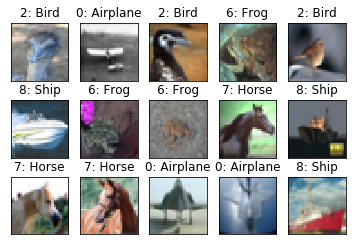

In [7]:
Llist = np.random.permutation(10)
print(Llist)
images, labels = next(cifar.get_validation_batch(15,5,Llist))

label_to_word = {
    0: "Airplane",
    1: "Autombile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(3, 5)
for i, ax in enumerate(np.reshape(axs, [-1])):
    ax.imshow(images[i])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(str(labels[i]) + ": " + label_to_word[labels[i]])
plt.show()

### Helper Functions

In [8]:
def printAll(globalVar):
    lst_vars = []
    for v in globalVar:
        lst_vars.append(v)
        print(v.name)
def getNames(globalVar):
    lst_vars = []
    for v in globalVar:
        lst_vars.append(v.name)
    return lst_vars
def getTensors(globalVar):
    lst_vars = []
    for v in globalVar:
        lst_vars.append(v)
    return lst_vars
def getUnititialized(allVars):
    uninitialized_vars = []
    for var in allVars:
        try:
            session.run(var)
        except tf.errors.FailedPreconditionError:
            uninitialized_vars.append(var)
    return uninitialized_vars
def getSubSet(toFreeze,All):
    for var in toFreeze:
        All.remove(var)
    return All
def OwnAccuracyCalculator(out,target,maxOld):
    numRight = 0
    RightNew = 0
    RightOld = 0
    WrongNew = 0
    WrongOld = 0
    for i,e in enumerate(out):
        label = np.argmax(e)       
        if target[i]<maxOld:         
            if label==target[i]:
                numRight = numRight+1
                RightOld = RightOld+1
            else:
                WrongOld = WrongOld+1
        else:
            if label==target[i]:
                numRight = numRight+1
                RightNew = RightNew+1
            else:
                WrongNew = WrongNew+1            
    AccAll = numRight/out.shape[0]
    AccOld = RightOld/(RightOld+WrongOld)
    try:
        AccNew = RightNew/(RightNew+WrongNew)
    except:
        AccNew = 0
    return AccAll,AccOld,AccNew
def smoothListGaussian(list,strippedXs=False,degree=5):  
    #Code from https://www.swharden.com/wp/2008-11-17-linear-data-smoothing-in-python/
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed
def perfQuantifier(accs,esteps,smooth=True):
    if smooth:
        smoothacc = smoothListGaussian(accs,degree=20)
    else:
        smoothacc = accs
    numEpochs = esteps.shape[0]
    plateauStart = np.zeros((esteps.shape[0]-1))
    pleateau = np.zeros((esteps.shape[0]-1))
    mins = np.zeros((esteps.shape[0]-1))
    for i in range(numEpochs-1):
        part = smoothacc[esteps[i]:esteps[i+1]]
        tenpermax = max(part)-0.02#plateau starts when max-2% is reached
        #max(part)-(max(part)-min(part))/4#get threshold of 10% below maximum
        pleateau[i] = tenpermax
        plateauStart[i] = np.where(part>tenpermax)[0][0]
        mins[i] = np.min(accs[esteps[i]:esteps[i+1]])
    return plateauStart,pleateau,mins
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z))).T
    return sm
#Plotting -------------------------------------------------------------------------------------------------------------
def plotPerformance(training_accuracies,validation_accuracies,steps,testacc,title):
    fig = plt.figure(figsize=(20,15))
    grid = plt.GridSpec(3,2,hspace=0.4, wspace=0.4)
    fig.add_subplot(grid[:2,:])
    plt.plot(training_accuracies)
    plt.plot(np.append(validation_accuracies,validation_accuracies[-1]), linewidth=5)
    plt.plot(np.full(steps[-1],testacc), linewidth=3, color = 'black')
    plt.xlabel("Training Step", fontsize=18)
    plt.ylabel("Accuracy in %", fontsize=18)
    plt.title(title, fontsize=18)
    plt.xlim(0,steps[-1]-10)
    plt.ylim(0,1)
    plt.legend(['training','validation','Test-Accuracy: '+str(testacc)],fontsize=20,loc=3)
    start,v,mini = perfQuantifier(training_accuracies,steps)
    for s in steps:
        plt.axvline(x=s,color='r')
    for i in range(steps.shape[0]-1):
        plt.plot(np.linspace(steps[i],steps[i+1],steps[i+1]-steps[i]),np.full(steps[i+1]-steps[i],v[i]), linewidth=2, color = 'green')
        plt.axvline(x=steps[i]+start[i],color='green')
    plt.scatter(steps[:-1],mini,color='r')

    fig.add_subplot(grid[2,0])
    plt.bar(np.linspace(0,start.shape[0]-1
                        ,start.shape[0]),start)
    plt.title("Steps until Convergance in Reached (Max-2%)", fontsize=18)
    plt.xlabel("Number of Reinitialization", fontsize=18)
    plt.ylabel("Number of Steps", fontsize=18)
    plt.xticks(np.linspace(0,start.shape[0]-1,start.shape[0]), np.linspace(0,start.shape[0]-1,start.shape[0])) 
    fig.add_subplot(grid[2,1])
    plt.bar(np.linspace(0,mini.shape[0]-1,mini.shape[0]),mini)
    plt.ylim(0,1)
    plt.title("Minimum Performance in this Training Cycle", fontsize=18)
    plt.xlabel("Number of Reinitialization", fontsize=18)
    plt.ylabel("Performance in %", fontsize=18)
    plt.xticks(np.linspace(0,mini.shape[0]-1,mini.shape[0]), np.linspace(0,mini.shape[0]-1,mini.shape[0]))

def createNodeImg(NIn,NOut):
    AllOut = []
    for i in range(NOut):
        node = np.full(NIn,i)
        AllOut = np.append(AllOut,node)
    return AllOut
def plotWeights(weights,NIn,NOut):
    nodeRef = createNodeImg(NIn,NOut)
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(weights.reshape((NIn*NOut)//(NOut*8),NOut*8),vmin=-0.05,vmax=0.05)
    ax.set_title("Weights for "+str(NOut)+" Output Nodes")
    plt.colorbar()
    ax2 = fig.add_subplot(1, 2, 2)
    plt.imshow(nodeRef.reshape((NIn*NOut)//(NOut*8),NOut*8))
    ax2.set_title("Reference for Nodes")
def plotOutDist(vlabels,out):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(vlabels,bins=out.shape[1])
    plt.title("Label Distribution")
    plt.subplot(1,2,2)
    plt.hist(np.argmax(out,axis=1),bins=out.shape[1])
    plt.title("Output Distribution")
def plotViolinWeights(weights,title):
    wdf = pd.DataFrame(weights)
    wdf = wdf.melt(var_name='groups', value_name='vals')
    fig = plt.figure(figsize=(15,5))
    sns.violinplot(x="groups", y="vals", data=wdf)
    plt.xlabel("Inputs to Class Node X",fontsize=18)
    plt.ylabel("Weights",fontsize=18)
    plt.title(title,fontsize=18)
def plotViolinWeightsAx(weights,title):
    wdf = pd.DataFrame(weights)
    wdf = wdf.melt(var_name='groups', value_name='vals')
    ax = sns.violinplot(x="groups", y="vals", data=wdf)
    ax.set_xlabel("Inputs to Class Node X",fontsize=18)
    ax.set_ylabel("Weights",fontsize=18)
    ax.set_title(title,fontsize=18)
    return ax

### Network Graph

In [15]:
tf.reset_default_graph()
numOutP=6 #Number of classes at the beginning of training
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
desired = tf.placeholder(tf.int64, shape = [None])

normx = tf.layers.batch_normalization(x)

with tf.variable_scope("model",reuse=tf.AUTO_REUSE):
    
    kernels_1 = tf.get_variable("kernels_1",shape=[5, 5, 3,16],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_1 = tf.nn.conv2d(normx, kernels_1, strides = [1, 1, 1,1], padding = "SAME", name="convolution_1")

    biases_1 = tf.get_variable("biases_1",[16],initializer=tf.constant_initializer(0.0))
    feature_maps_1 = tf.nn.tanh(convolution_1 + biases_1, name="feature_maps_1")
    print(feature_maps_1.shape)

    pool_1 = tf.nn.max_pool(feature_maps_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_1")
    print(pool_1.shape)

    kernels_2 = tf.get_variable("kernels_2",[3, 3, 16, 32],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_2 = tf.nn.conv2d(tf.layers.batch_normalization(pool_1), kernels_2, strides = [1, 1, 1, 1], padding = "SAME", name="convolution_2")

    biases_2 = tf.get_variable("biases_2",[32],initializer=tf.constant_initializer(0.0))
    feature_maps_2 = tf.nn.tanh(convolution_2 + biases_2, name="feature_maps_2")
    print(feature_maps_2.shape)

    pool_2 = tf.nn.max_pool(feature_maps_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_2")
    print("pool2: "+str(pool_2.shape))

    flattened = tf.reshape(tf.layers.batch_normalization(pool_2), [-1, 8 * 8 * 32], name="flattened")
    print(flattened.shape)
    
    startVars2 = getTensors(tf.global_variables())
    
    weights_3 = tf.get_variable("weights_3",[2048, 512],initializer=tf.truncated_normal_initializer(stddev = 1568**(-1/2)))
    biases_3 = tf.get_variable("biases_3",[512],initializer=tf.constant_initializer(0.0))
    hidden_layer = tf.nn.tanh(tf.matmul(flattened, weights_3) + biases_3, name="hidden_layer")
    print(hidden_layer)
#startVars2 = getTensors(tf.global_variables()) # uncomment to only retrain last layer
startVars = getTensors(tf.global_variables())
def newLast(hiddenIn,numOut):
    with tf.variable_scope("LastLayer",reuse=False):
        weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.truncated_normal_initializer(stddev = 512**(-1/2)))
        #weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.constant_initializer(0.01))
        print("w4: "+str(weights_4))
        biases_4 = tf.get_variable('biases_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
        output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
    return output_layer_logits,weights_4

def newLastInit(hiddenIn,numOut,init):
    with tf.variable_scope("LastLayerInit",reuse=False):
        weights_4 = tf.get_variable('weightsI_4'+str(numOut),[512,numOut],initializer=init)
        biases_4 = tf.get_variable('biasesI_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
        output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
    return output_layer_logits,weights_4
    
def evaluate(outLogs,desired):    
    with tf.variable_scope("eval",reuse=tf.AUTO_REUSE):
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = desired, logits = outLogs)
        accuracy = tf.equal(tf.argmax(tf.nn.softmax(outLogs), 1), desired)
        
    return accuracy,cross_entropy

with tf.variable_scope(tf.get_variable_scope()):
    outLog,w4 = newLast(hidden_layer,numOutP)
    print("out: "+str(outLog.shape))
    acc,CE = evaluate(outLog,desired)

accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
cross_entropy = tf.reduce_mean(CE)

learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')
#optimizer = tf.train.GradientDescentOptimizer(learning_rate,name='op_0')
training_step = optimizer.minimize(cross_entropy)
gradient = tf.gradients(cross_entropy, w4)[0]
print(gradient)

#startVars = getTensors(tf.global_variables())
#printAll(tf.global_variables())
DontFreezeList = getSubSet(startVars2,startVars)
#print("Don't freeze: "+str(DontFreezeList))
#print(startVars2)

(?, 32, 32, 16)
(?, 16, 16, 16)
(?, 16, 16, 32)
pool2: (?, 8, 8, 32)
(?, 2048)
Tensor("model/hidden_layer:0", shape=(?, 512), dtype=float32)
w4: <tf.Variable 'LastLayer/weights_46:0' shape=(512, 6) dtype=float32_ref>
out: (?, 6)
Tensor("gradients_1/LastLayer/MatMul_grad/MatMul_1:0", shape=(512, 6), dtype=float32)


### Normal Training

## Random Class Order

In [ ]:
numExperiments = 100
epochs = 1 #Number of epochs in each block (how often is the training set itterated before a new class is added)
newClasses = 5 #Number of new classes introduced
KeepTrain = 10

mini_batch_size = 200
plot_step_size = 50
training_steps = cifar.get_sizes()[0] // mini_batch_size

training_cross_entropies = np.zeros((training_steps * epochs * (newClasses+KeepTrain),numExperiments))
validation_cross_entropies = np.zeros((training_steps * epochs * (newClasses+KeepTrain),numExperiments))

training_accuracies = np.zeros((training_steps * epochs * (newClasses+KeepTrain),numExperiments))
training_accuracies_old = np.zeros((training_steps * epochs * (newClasses+KeepTrain),numExperiments))
training_accuracies_new = np.zeros((training_steps * epochs * (newClasses+KeepTrain),numExperiments))
validation_accuracies = np.zeros((training_steps * epochs * (newClasses+KeepTrain),numExperiments))
testaccs = np.zeros(numExperiments)
allOuts = []
allTargets = []

ESteps = [0]
#weightName = 'LastLayer/weights_46/op_0:0'

for exp in range(numExperiments):
    Llist = np.linspace(0,9,10)#np.random.permutation(10)
    #print(Llist)
    numC=6 #Number of classes in the beginning of training
    #-----------------------------------------------------------
    numOutP=10 #Number of classes at the beginning of training
    outName = 'LastLayer/add:0'
    tf.reset_default_graph()
    
    weightName = 'LastLayer/weights_4'+str(numOutP)+':0'
    x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
    desired = tf.placeholder(tf.int64, shape = [None])

    normx = tf.layers.batch_normalization(x)

    with tf.variable_scope("model",reuse=tf.AUTO_REUSE):

        kernels_1 = tf.get_variable("kernels_1",shape=[5, 5, 3,16],initializer=tf.truncated_normal_initializer(stddev = 0.1))
        convolution_1 = tf.nn.conv2d(normx, kernels_1, strides = [1, 1, 1,1], padding = "SAME", name="convolution_1")

        biases_1 = tf.get_variable("biases_1",[16],initializer=tf.constant_initializer(0.0))
        feature_maps_1 = tf.nn.tanh(convolution_1 + biases_1, name="feature_maps_1")

        pool_1 = tf.nn.max_pool(feature_maps_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_1")

        kernels_2 = tf.get_variable("kernels_2",[3, 3, 16, 32],initializer=tf.truncated_normal_initializer(stddev = 0.1))
        convolution_2 = tf.nn.conv2d(tf.layers.batch_normalization(pool_1), kernels_2, strides = [1, 1, 1, 1], padding = "SAME", name="convolution_2")

        biases_2 = tf.get_variable("biases_2",[32],initializer=tf.constant_initializer(0.0))
        feature_maps_2 = tf.nn.tanh(convolution_2 + biases_2, name="feature_maps_2")

        pool_2 = tf.nn.max_pool(feature_maps_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_2")

        flattened = tf.reshape(tf.layers.batch_normalization(pool_2), [-1, 8 * 8 * 32], name="flattened")
        print(flattened.shape)

        startVars2 = getTensors(tf.global_variables())

        weights_3 = tf.get_variable("weights_3",[2048, 512],initializer=tf.truncated_normal_initializer(stddev = 1568**(-1/2)))
        biases_3 = tf.get_variable("biases_3",[512],initializer=tf.constant_initializer(0.0))
        hidden_layer = tf.nn.tanh(tf.matmul(flattened, weights_3) + biases_3, name="hidden_layer")
    #startVars2 = getTensors(tf.global_variables()) # uncomment to only retrain last layer
    startVars = getTensors(tf.global_variables())
    def newLast(hiddenIn,numOut):
        with tf.variable_scope("LastLayer",reuse=False):
            weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.truncated_normal_initializer(stddev = 512**(-1/2)))
            #weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.constant_initializer(0.01))
            biases_4 = tf.get_variable('biases_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
            output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
        return output_layer_logits,weights_4

    def newLastInit(hiddenIn,numOut,init):
        with tf.variable_scope("LastLayerInit",reuse=False):
            weights_4 = tf.get_variable('weightsI_4'+str(numOut),[512,numOut],initializer=init)
            biases_4 = tf.get_variable('biasesI_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
            output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
        return output_layer_logits,weights_4

    def evaluate(outLogs,desired):    
        with tf.variable_scope("eval",reuse=tf.AUTO_REUSE):
            cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = desired, logits = outLogs)
            accuracy = tf.equal(tf.argmax(tf.nn.softmax(outLogs), 1), desired)

        return accuracy,cross_entropy

    with tf.variable_scope(tf.get_variable_scope()):
        outLog,w4 = newLast(hidden_layer,numOutP)
        acc,CE = evaluate(outLog,desired)

    accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
    cross_entropy = tf.reduce_mean(CE)

    learning_rate = 1e-4
    optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate,name='op_0')
    training_step = optimizer.minimize(cross_entropy)
    gradient = tf.gradients(cross_entropy, w4)[0]
    print(gradient)

    #startVars = getTensors(tf.global_variables())
    #printAll(tf.global_variables())
    DontFreezeList = getSubSet(startVars2,startVars)
    #print("Don't freeze: "+str(DontFreezeList))
    #print(startVars2)

    #-------------------------------------------------
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
        session.run(tf.global_variables_initializer())
        step = 0
        for nC in range(newClasses+KeepTrain):             
            last_step = False
            if (nC>0) & (nC<newClasses) & (nC<0):
                DontFreezeList = getSubSet(newVars,DontFreezeList)#Exclude last layer from previous epoch
                initializer = tf.constant_initializer(np.append(weights,np.random.choice(weights.flatten(),(512,1)),axis=1))
                #initializer = tf.constant_initializer(weights)
                with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE):
                    outLog,Wname = newLastInit(hidden_layer,numOutP,initializer)
                    acc,CE = evaluate(outLog,desired)
                    accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
                    cross_entropy = tf.reduce_mean(CE)
                    learning_rate = 1e-4
                    optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')

                weightName = Wname
                gradient = tf.gradients(cross_entropy, weightName)[0]
                newVars = getUnititialized(tf.all_variables())
                DontFreezeList = np.append(DontFreezeList,newVars,axis=0).tolist()
                #print(DontFreezeList)
                #training_step = optimizer.minimize(cross_entropy, var_list=DontFreezeList)#Only train part of network
                training_step = optimizer.minimize(cross_entropy)#keep training all
                uninitialized_vars = getUnititialized(tf.all_variables())
                init_new_vars_op = tf.initialize_variables(uninitialized_vars)
                session.run(init_new_vars_op)
            else:
                newVars = []
            s = 0
            for epoch in range(epochs):
                for images, labels in cifar.get_training_batch(mini_batch_size,numC-1,Llist):            
                    if s == 0:
                        training_cross_entropies[step,exp], training_accuracies[step,exp],FirstOut,Firstweights,Firstgrad = session.run(
                        [cross_entropy, accuracy, outLog,weightName,gradient],feed_dict ={x: images, desired: labels}
                    )
                        FirstL = labels
                    s = s+1
                    training_cross_entropies[step,exp], training_accuracies[step,exp], _ ,trainOut= session.run(
                        [cross_entropy, accuracy, training_step,outLog],feed_dict ={x: images, desired: labels}
                    )
                    Aall,old,new = OwnAccuracyCalculator(trainOut,labels,numC-1)
                    training_accuracies_old[step,exp] = old               
                    training_accuracies_new[step,exp] = new
                    allOuts.append(trainOut)
                    allTargets.append(labels)
                    if step == (training_steps * epochs * newClasses)-(training_steps+4):
                        last_step = True

                    if step % plot_step_size == 0 or last_step:
                        images, vlabels = next(cifar.get_validation_batch(0,numC-1,Llist))

                        validation_cross_entropy, validation_accuracy,out,weights,grad= session.run(
                            [cross_entropy, accuracy,outLog,weightName,gradient],
                            feed_dict = {x: images, desired: vlabels}
                        )

                        if step != 0:
                            on = step - plot_step_size if not last_step else step - plot_step_size + 1
                            off = on + plot_step_size
                            validation_cross_entropies[on:off,exp] = [validation_cross_entropy] * plot_step_size
                            validation_accuracies[on:off,exp] = [validation_accuracy] * plot_step_size
                    step += 1
            print(numC)
            if nC < (newClasses-1):
                numC = numC+1 #increase number of classes in the dataset
              #  numOutP = numOutP +1 #increase number of output neurons
            print(weights.shape)
            ESteps = np.append(ESteps,step)
            #n=n+1
        images, testlabels =next(cifar.get_test_batch(0,numC-1))
        testaccs[exp],grad= session.run([accuracy,gradient],feed_dict = {x: images, desired: testlabels})

(?, 2048)
Tensor("gradients_1/LastLayer/MatMul_grad/MatMul_1:0", shape=(512, 10), dtype=float32)
6
(512, 10)
7
(512, 10)
8
(512, 10)
9
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
(?, 2048)
Tensor("gradients_1/LastLayer/MatMul_grad/MatMul_1:0", shape=(512, 10), dtype=float32)
6
(512, 10)
7
(512, 10)
8
(512, 10)
9
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)
10
(512, 10)


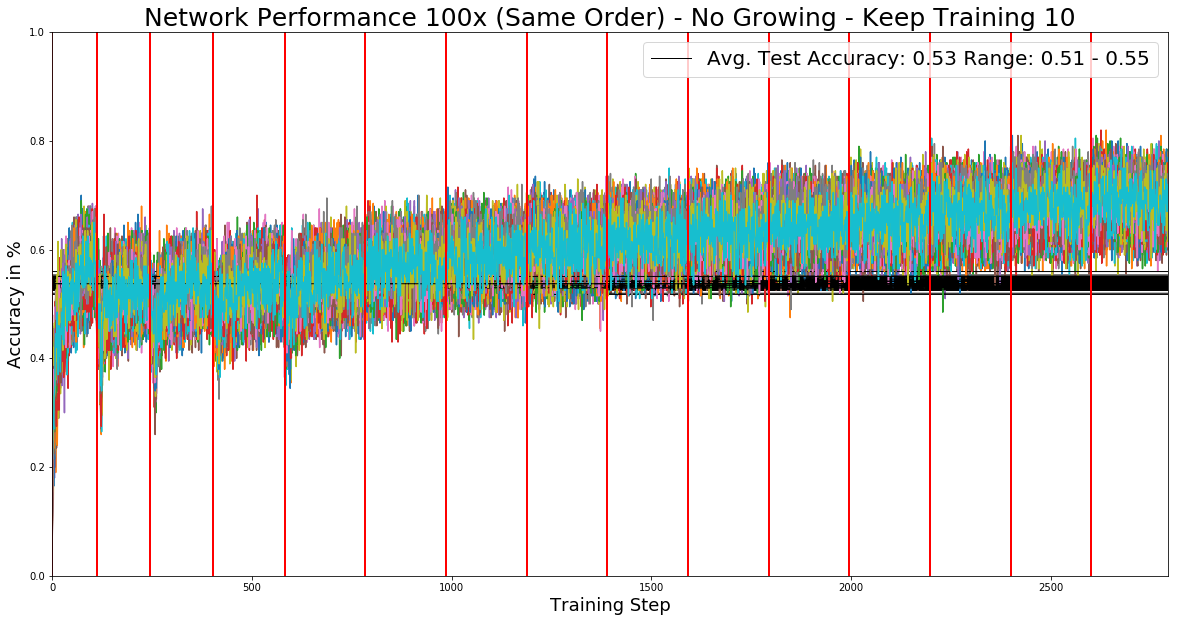

In [23]:
plt.figure(figsize=(20,10))
for e in range(numExperiments):
    plt.plot(np.full(ESteps[-1],testaccs[e]), linewidth=1, color = 'black')
    plt.plot(training_accuracies.T[e])
    
plt.legend(['Avg. Test Accuracy: '+str(np.mean(testaccs))[:4]+" Range: "+str(min(testaccs))[:4]+" - "+str(max(testaccs))[:4]],fontsize=20)
plt.xlabel("Training Step", fontsize=18)
plt.ylabel("Accuracy in %", fontsize=18)
plt.title("Network Performance 100x (Same Order) - No Growing - Keep Training 10", fontsize=25)
plt.xlim(0,ESteps[-1]-10)
plt.ylim(0,1)
for e in ESteps:
    plt.axvline(x=e,color='r')
plt.savefig("NewResults/CIFAR_NoGrow_NoShuffle100_KeepTrain10.png")
#plt.show()
#plt.legend(np.linspace(0,9,10),fontsize=20,loc=3)

In [24]:
keepTrainAccsNoG = testaccs

In [25]:
np.save('KeepTrainAccsNoG.npy',keepTrainAccsNoG)

In [89]:
np.min(testaccs)

0.45329999923706055

In [12]:
tf.reset_default_graph()
numOutP=10 #Number of classes at the beginning of training
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
desired = tf.placeholder(tf.int64, shape = [None])

normx = tf.layers.batch_normalization(x)

with tf.variable_scope("model",reuse=tf.AUTO_REUSE):
    
    kernels_1 = tf.get_variable("kernels_1",shape=[5, 5, 3,16],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_1 = tf.nn.conv2d(normx, kernels_1, strides = [1, 1, 1,1], padding = "SAME", name="convolution_1")

    biases_1 = tf.get_variable("biases_1",[16],initializer=tf.constant_initializer(0.0))
    feature_maps_1 = tf.nn.tanh(convolution_1 + biases_1, name="feature_maps_1")

    pool_1 = tf.nn.max_pool(feature_maps_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_1")

    kernels_2 = tf.get_variable("kernels_2",[3, 3, 16, 32],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_2 = tf.nn.conv2d(tf.layers.batch_normalization(pool_1), kernels_2, strides = [1, 1, 1, 1], padding = "SAME", name="convolution_2")

    biases_2 = tf.get_variable("biases_2",[32],initializer=tf.constant_initializer(0.0))
    feature_maps_2 = tf.nn.tanh(convolution_2 + biases_2, name="feature_maps_2")

    pool_2 = tf.nn.max_pool(feature_maps_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_2")

    flattened = tf.reshape(tf.layers.batch_normalization(pool_2), [-1, 8 * 8 * 32], name="flattened")
    
    startVars2 = getTensors(tf.global_variables())
    
    weights_3 = tf.get_variable("weights_3",[2048, 512],initializer=tf.truncated_normal_initializer(stddev = 1568**(-1/2)))
    biases_3 = tf.get_variable("biases_3",[512],initializer=tf.constant_initializer(0.0))
    hidden_layer = tf.nn.tanh(tf.matmul(flattened, weights_3) + biases_3, name="hidden_layer")
#startVars2 = getTensors(tf.global_variables()) # uncomment to only retrain last layer
startVars = getTensors(tf.global_variables())
def newLast(hiddenIn,numOut):
    with tf.variable_scope("LastLayer",reuse=False):
        weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.truncated_normal_initializer(stddev = 512**(-1/2)))
        #weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.constant_initializer(0.01))
        print("w4: "+str(weights_4))
        biases_4 = tf.get_variable('biases_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
        output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
    return output_layer_logits,weights_4


def evaluate(outLogs,desired):    
    with tf.variable_scope("eval",reuse=tf.AUTO_REUSE):
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = desired, logits = outLogs)
        accuracy = tf.equal(tf.argmax(tf.nn.softmax(outLogs), 1), desired)
        
    return accuracy,cross_entropy

with tf.variable_scope(tf.get_variable_scope()):
    outLog,w4 = newLast(hidden_layer,numOutP)
    print("out: "+str(outLog.shape))
    acc,CE = evaluate(outLog,desired)

accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
cross_entropy = tf.reduce_mean(CE)

learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')
#optimizer = tf.train.GradientDescentOptimizer(learning_rate,name='op_0')
training_step = optimizer.minimize(cross_entropy)
gradient = tf.gradients(cross_entropy, w4)[0]

#startVars = getTensors(tf.global_variables())
#printAll(tf.global_variables())
DontFreezeList = getSubSet(startVars2,startVars)

epochs = 1 #Number of epochs in each block (how often is the training set itterated before a new class is added)
newClasses = 5 #Number of new classes introduced
numC=10 #Number of classes in the beginning of training

mini_batch_size = 200
plot_step_size = 50
training_steps = cifar.get_sizes()[0] // mini_batch_size

training_cross_entropies = np.zeros(training_steps * epochs * newClasses)
validation_cross_entropies = np.zeros(training_steps * epochs * newClasses)

training_accuracies = np.zeros(training_steps * epochs * newClasses)
training_accuracies_old = np.zeros(training_steps * epochs * newClasses)
training_accuracies_new = np.zeros(training_steps * epochs * newClasses)
validation_accuracies = np.zeros(training_steps * epochs * newClasses)

allOuts = []
allTargets = []

ESteps = [0]
weightName = 'LastLayer/weights_4'+str(numOutP)+':0'
outName = 'LastLayer/add:0'
n=1
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
    session.run(tf.global_variables_initializer())
    step = 0
    for nC in range(newClasses):             
        last_step = False
        s = 0
        for epoch in range(epochs):
            for images, labels in cifar.get_training_batch(mini_batch_size,numC-1):            
                if s == 0:
                    training_cross_entropies[step], training_accuracies[step],FirstOut,Firstweights,Firstgrad = session.run(
                    [cross_entropy, accuracy, outLog,weightName,gradient],feed_dict ={x: images, desired: labels}
                )
                    FirstL = labels
                s = s+1
                training_cross_entropies[step], training_accuracies[step], _ ,trainOut= session.run(
                    [cross_entropy, accuracy, training_step,outLog],feed_dict ={x: images, desired: labels}
                )
                Aall,old,new = OwnAccuracyCalculator(trainOut,labels,numC-1)
                training_accuracies_old[step] = old               
                training_accuracies_new[step] = new
                allOuts.append(trainOut)
                allTargets.append(labels)
                if step == (training_steps * epochs * newClasses)-(training_steps+4):
                    last_step = True

                if step % plot_step_size == 0 or last_step:
                    images, vlabels = next(cifar.get_validation_batch(0,numC-1))
                    
                    validation_cross_entropy, validation_accuracy,out,weights,grad= session.run(
                        [cross_entropy, accuracy,outLog,weightName,gradient],
                        feed_dict = {x: images, desired: vlabels}
                    )
                    
                    if step != 0:
                        on = step - plot_step_size if not last_step else step - plot_step_size + 1
                        off = on + plot_step_size
                        validation_cross_entropies[on:off] = [validation_cross_entropy] * plot_step_size
                        validation_accuracies[on:off] = [validation_accuracy] * plot_step_size
                step += 1

        print("Shape of Output Layer: "+str(weights.shape))
        #----Plot distribution of weights or gradients over the layer and epochs----
        #ax = fig.add_subplot(7, 1, n)
        #plotViolinWeightsAx(weights,"End Weights for each Output Node - Old Weight Init, Zero Start")
        #----Plot weights of the last layer for each epoch------
        #plotWeights(weights,512,weights.shape[1])
        #print(FirstOut[1])
        #----Plot Output activations for each epoch-------
        """ax = fig.add_subplot(2, 6, n)
        plt.imshow(out[0].reshape((numC-1,1)))
        ax.set_title("target: "+str(vlabels[0]))
        plt.colorbar()
        ax = fig.add_subplot(2, 6, n+1)
        plt.imshow(softmax(out[0]).reshape((numC-1,1)),vmin=-1,vmax=1)
        ax.set_title("target: "+str(vlabels[0]))
        plt.colorbar()
        n = n+2"""
        ESteps = np.append(ESteps,step)
        #n=n+1
    images, testlabels =next(cifar.get_test_batch(0,numC-1))
    test_accuracy,grad= session.run([accuracy,gradient],feed_dict = {x: images, desired: testlabels})

w4: <tf.Variable 'LastLayer/weights_410:0' shape=(512, 10) dtype=float32_ref>
out: (?, 10)
Shape of Output Layer: (512, 10)
Shape of Output Layer: (512, 10)
Shape of Output Layer: (512, 10)
Shape of Output Layer: (512, 10)
Shape of Output Layer: (512, 10)


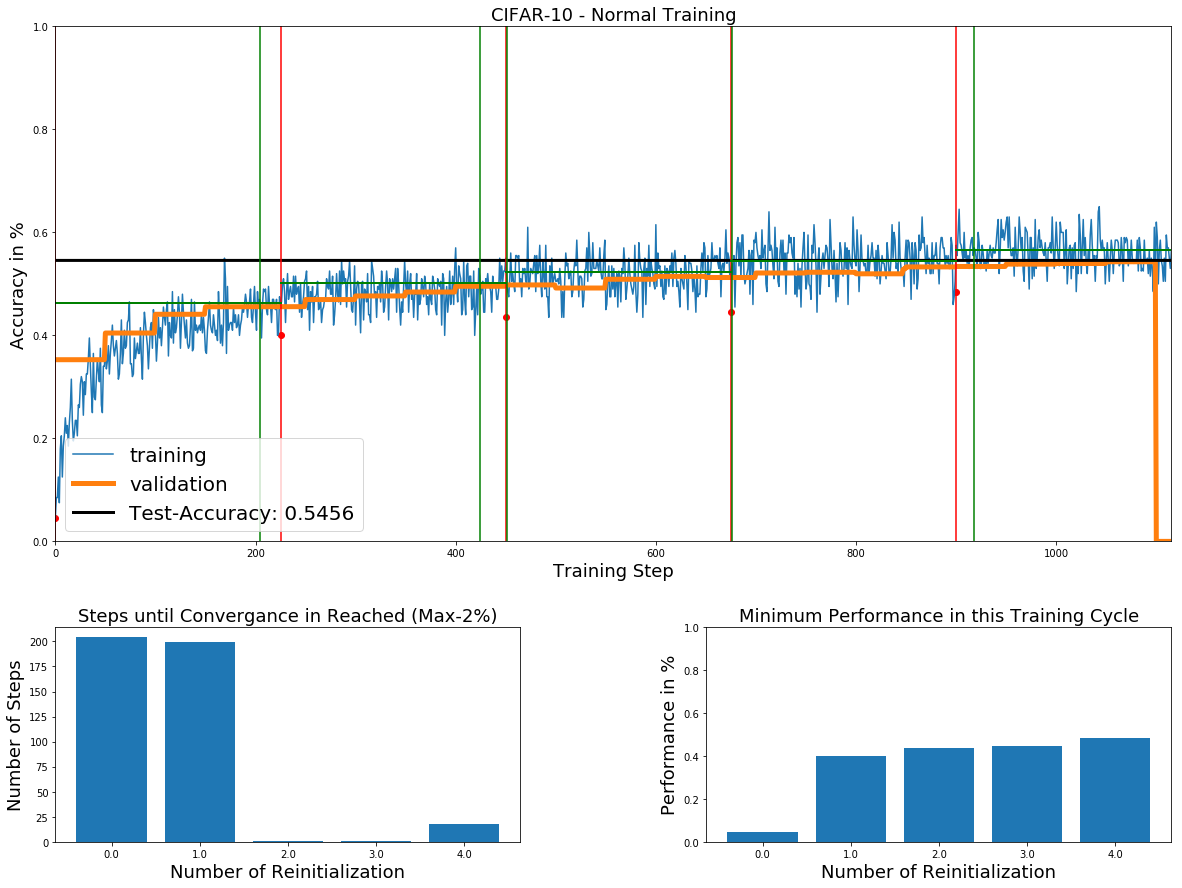

In [13]:
plotPerformance(training_accuracies,validation_accuracies,ESteps,test_accuracy,"CIFAR-10 - Normal Training")

In [14]:
def getClassPerf(Output,Target,MaxNumC,MaxSteps):
    perfs = np.zeros((MaxNumC,MaxSteps))
    for i,e in enumerate(Output):
        label = np.argmax(e,axis=1)
        for c in np.unique(Target[i]):
            ClassPreds = label[Target[i]==c]
            classPerf = len(ClassPreds[ClassPreds==c])/len(ClassPreds)
            perfs[c][i] = classPerf
    return perfs
        
CPs = getClassPerf(allOuts,allTargets,10,len(allOuts))

In [15]:
smoothed = []
for c in CPs:
    smoothed.append(smoothListGaussian(c,degree=20))

In [17]:
legend = []
for i in np.linspace(0,9,10,dtype=int):
    legend.append(str(i)+": "+str(label_to_word[i]))

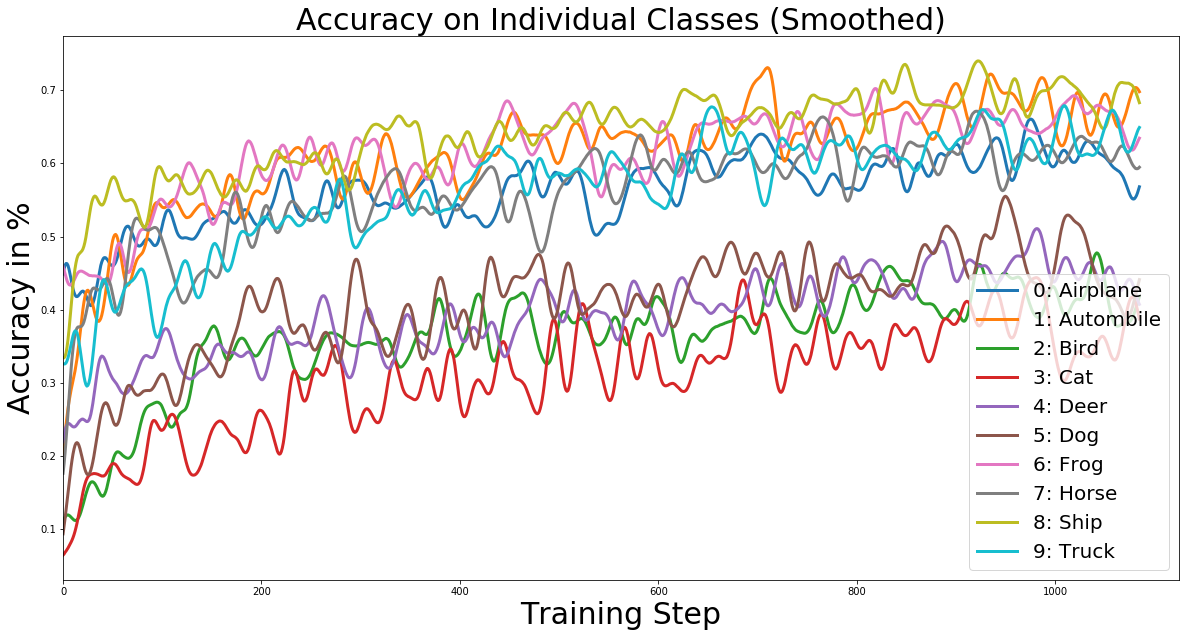

In [21]:
plt.figure(figsize=(20,10))
plt.plot(np.array(smoothed).T,linewidth=3)
plt.xlabel("Training Step", fontsize=30)
plt.ylabel("Accuracy in %", fontsize=30)
plt.title("Accuracy on Individual Classes (Smoothed)", fontsize=30)
plt.xlim(0,len(allOuts))
plt.legend(legend,fontsize=20,loc=4)
#for e in ESteps: #Show Epochs
#    plt.axvline(x=e,color='r')
plt.show()
#plt.savefig('NewResults/CIFAR10_ClassAccSmooth.png', bbox_inches='tight')

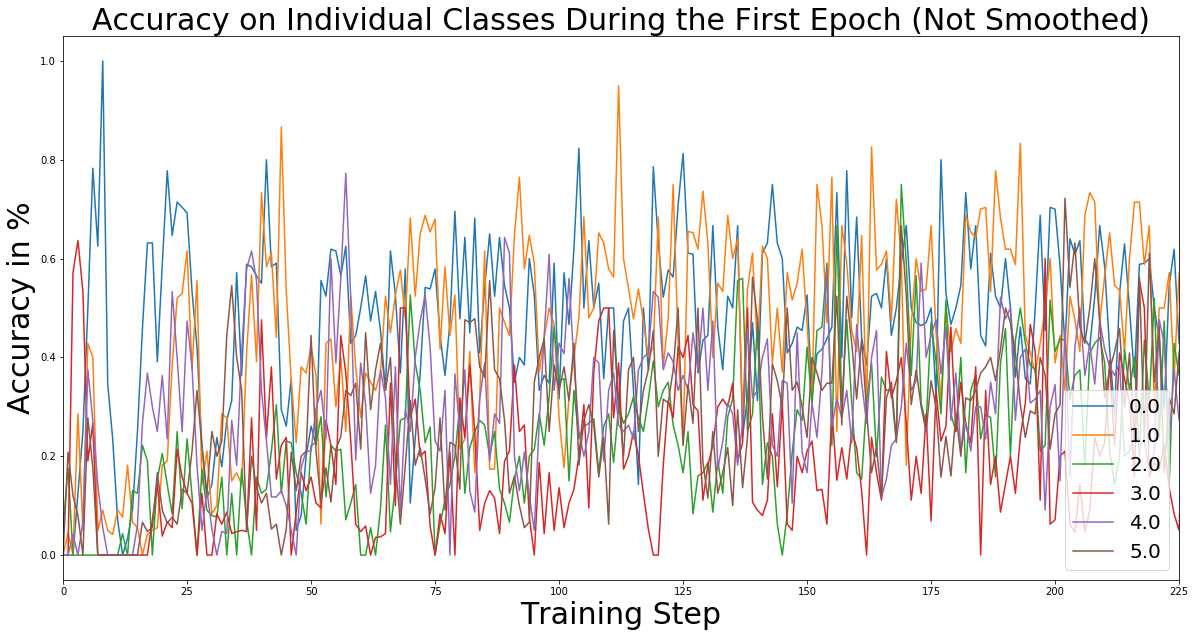

In [22]:
plt.figure(figsize=(20,10))
plt.plot(CPs[:6].T)
plt.xlabel("Training Step", fontsize=30)
plt.ylabel("Accuracy in %", fontsize=30)
plt.title("Accuracy on Individual Classes During the First Epoch (Not Smoothed)", fontsize=30)
plt.xlim(0,ESteps[1])
plt.legend(np.linspace(0,5,6),fontsize=20,loc=4)
plt.show()
#plt.savefig("Results/MNIST_ClassAcc_FirstEP.png")

## Growing Experiments
### Progressive Learning (No Growing)

In [33]:
numC=6 #Number of classes in the beginning of training
numOutP=10 #Number of classes at the beginning of training
epochs = 1 #Number of epochs in each block (how often is the training set itterated before a new class is added)
newClasses = 5 #Number of new classes introduced
mini_batch_size = 200
plot_step_size = 50

outName = 'LastLayer/add:0'
tf.reset_default_graph()

weightName = 'LastLayer/weights_4'+str(numOutP)+':0'
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
desired = tf.placeholder(tf.int64, shape = [None])

normx = tf.layers.batch_normalization(x)

with tf.variable_scope("model",reuse=tf.AUTO_REUSE):

    kernels_1 = tf.get_variable("kernels_1",shape=[5, 5, 3,16],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_1 = tf.nn.conv2d(normx, kernels_1, strides = [1, 1, 1,1], padding = "SAME", name="convolution_1")

    biases_1 = tf.get_variable("biases_1",[16],initializer=tf.constant_initializer(0.0))
    feature_maps_1 = tf.nn.tanh(convolution_1 + biases_1, name="feature_maps_1")

    pool_1 = tf.nn.max_pool(feature_maps_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_1")

    kernels_2 = tf.get_variable("kernels_2",[3, 3, 16, 32],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_2 = tf.nn.conv2d(tf.layers.batch_normalization(pool_1), kernels_2, strides = [1, 1, 1, 1], padding = "SAME", name="convolution_2")

    biases_2 = tf.get_variable("biases_2",[32],initializer=tf.constant_initializer(0.0))
    feature_maps_2 = tf.nn.tanh(convolution_2 + biases_2, name="feature_maps_2")

    pool_2 = tf.nn.max_pool(feature_maps_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_2")

    flattened = tf.reshape(tf.layers.batch_normalization(pool_2), [-1, 8 * 8 * 32], name="flattened")
    print(flattened.shape)

    startVars2 = getTensors(tf.global_variables())

    weights_3 = tf.get_variable("weights_3",[2048, 512],initializer=tf.truncated_normal_initializer(stddev = 1568**(-1/2)))
    biases_3 = tf.get_variable("biases_3",[512],initializer=tf.constant_initializer(0.0))
    hidden_layer = tf.nn.tanh(tf.matmul(flattened, weights_3) + biases_3, name="hidden_layer")
#startVars2 = getTensors(tf.global_variables()) # uncomment to only retrain last layer
startVars = getTensors(tf.global_variables())
def newLast(hiddenIn,numOut):
    with tf.variable_scope("LastLayer",reuse=False):
        weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.truncated_normal_initializer(stddev = 512**(-1/2)))
        #weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.constant_initializer(0.01))
        biases_4 = tf.get_variable('biases_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
        output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
    return output_layer_logits,weights_4

def evaluate(outLogs,desired):    
    with tf.variable_scope("eval",reuse=tf.AUTO_REUSE):
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = desired, logits = outLogs)
        accuracy = tf.equal(tf.argmax(tf.nn.softmax(outLogs), 1), desired)

    return accuracy,cross_entropy

with tf.variable_scope(tf.get_variable_scope()):
    outLog,w4 = newLast(hidden_layer,numOutP)
    acc,CE = evaluate(outLog,desired)

accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
cross_entropy = tf.reduce_mean(CE)

learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')
#optimizer = tf.train.GradientDescentOptimizer(learning_rate,name='op_0')
training_step = optimizer.minimize(cross_entropy)
gradient = tf.gradients(cross_entropy, w4)[0]

DontFreezeList = getSubSet(startVars2,startVars)


training_steps = cifar.get_sizes()[0] // mini_batch_size

training_cross_entropies = np.zeros(training_steps * epochs * newClasses)
validation_cross_entropies = np.zeros(training_steps * epochs * newClasses)

training_accuracies = np.zeros(training_steps * epochs * newClasses)
training_accuracies_old = np.zeros(training_steps * epochs * newClasses)
training_accuracies_new = np.zeros(training_steps * epochs * newClasses)
validation_accuracies = np.zeros(training_steps * epochs * newClasses)

allOuts = []
allTargets = []

ESteps = [0]
#weightName = 'LastLayer/weights_46/op_0:0'
weightName = 'LastLayer/weights_4'+str(numOutP)+':0'
outName = 'LastLayer/add:0'
n=1
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
    session.run(tf.global_variables_initializer())
    step = 0
    for nC in range(newClasses):             
        last_step = False
        
        s = 0
        for epoch in range(epochs):
            for images, labels in cifar.get_training_batch(mini_batch_size,numC-1):            
                if s == 0:
                    training_cross_entropies[step], training_accuracies[step],FirstOut,Firstweights,Firstgrad = session.run(
                    [cross_entropy, accuracy, outLog,weightName,gradient],feed_dict ={x: images, desired: labels}
                )
                    FirstL = labels
                s = s+1
                training_cross_entropies[step], training_accuracies[step], _ ,trainOut= session.run(
                    [cross_entropy, accuracy, training_step,outLog],feed_dict ={x: images, desired: labels}
                )
                Aall,old,new = OwnAccuracyCalculator(trainOut,labels,numC-1)
                training_accuracies_old[step] = old               
                training_accuracies_new[step] = new
                allOuts.append(trainOut)
                allTargets.append(labels)
                if step == (training_steps * epochs * newClasses)-(training_steps+4):
                    last_step = True

                if step % plot_step_size == 0 or last_step:
                    images, vlabels = next(cifar.get_validation_batch(0,numC-1))
                    
                    validation_cross_entropy, validation_accuracy,out,weights,grad= session.run(
                        [cross_entropy, accuracy,outLog,weightName,gradient],
                        feed_dict = {x: images, desired: vlabels}
                    )
                    
                    if step != 0:
                        on = step - plot_step_size if not last_step else step - plot_step_size + 1
                        off = on + plot_step_size
                        validation_cross_entropies[on:off] = [validation_cross_entropy] * plot_step_size
                        validation_accuracies[on:off] = [validation_accuracy] * plot_step_size
                step += 1
        print("Number of Classes in Training Data: "+str(numC))
        numC = numC+1 #increase number of classes in the dataset
        #numOutP = numOutP +1 #increase number of output neurons
        print("Shape of Output Layer: "+str(weights.shape))
        #----Plot distribution of weights or gradients over the layer and epochs----
        #ax = fig.add_subplot(7, 1, n)
        #plotViolinWeightsAx(weights,"End Weights for each Output Node - Old Weight Init, Zero Start")
        #----Plot weights of the last layer for each epoch------
        #plotWeights(weights,512,weights.shape[1])
        #print(FirstOut[1])
        #----Plot Output activations for each epoch-------
        """ax = fig.add_subplot(2, 6, n)
        plt.imshow(out[0].reshape((numC-1,1)))
        ax.set_title("target: "+str(vlabels[0]))
        plt.colorbar()
        ax = fig.add_subplot(2, 6, n+1)
        plt.imshow(softmax(out[0]).reshape((numC-1,1)),vmin=-1,vmax=1)
        ax.set_title("target: "+str(vlabels[0]))
        plt.colorbar()
        n = n+2"""
        ESteps = np.append(ESteps,step)
        #n=n+1
    images, testlabels =next(cifar.get_test_batch(0,numC-1))
    test_accuracy,grad= session.run([accuracy,gradient],feed_dict = {x: images, desired: testlabels})

(?, 2048)
Number of Classes in Training Data: 6
Shape of Output Layer: (512, 10)
Number of Classes in Training Data: 7
Shape of Output Layer: (512, 10)
Number of Classes in Training Data: 8
Shape of Output Layer: (512, 10)
Number of Classes in Training Data: 9
Shape of Output Layer: (512, 10)
Number of Classes in Training Data: 10
Shape of Output Layer: (512, 10)


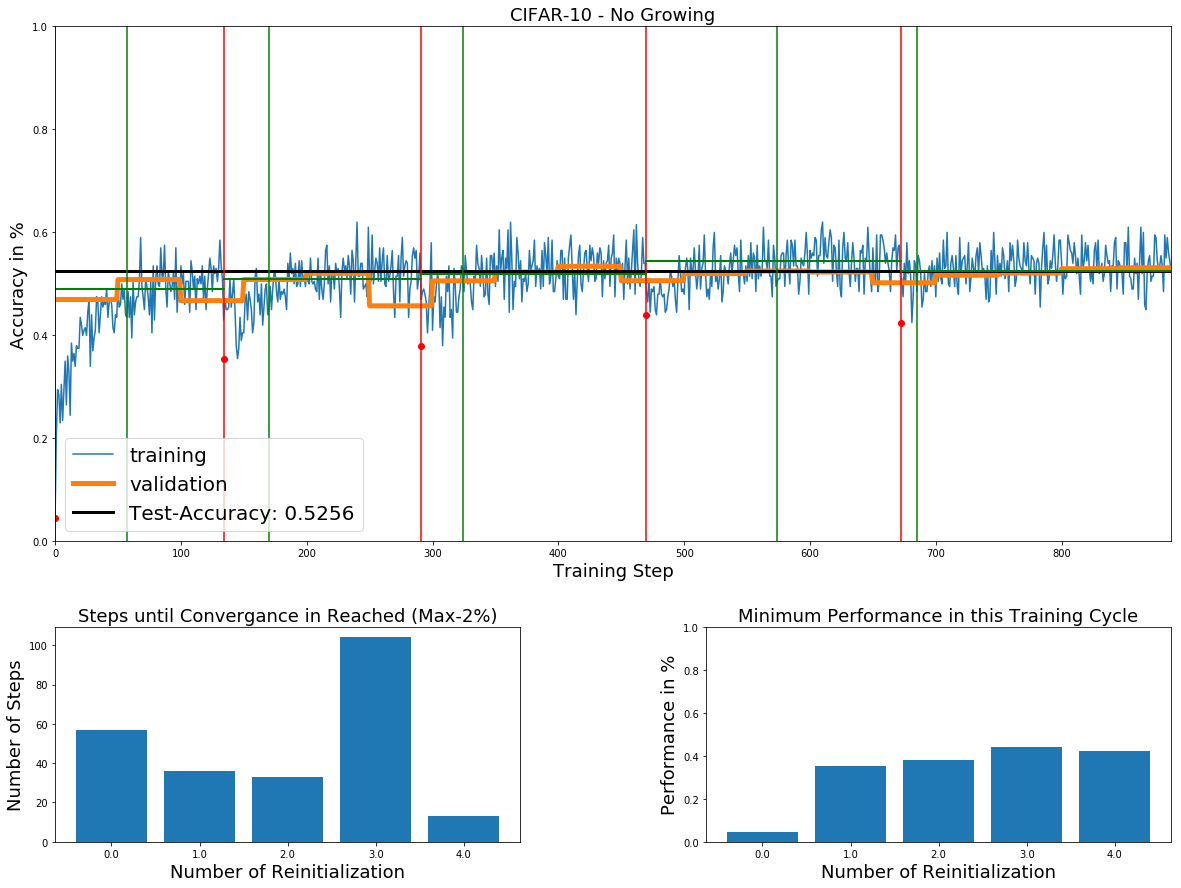

In [34]:
plotPerformance(training_accuracies,validation_accuracies,ESteps,test_accuracy,"CIFAR-10 - No Growing")

### Progressive Learning With Network Growing

In [41]:
numC=6 #Number of classes in the beginning of training
numOutP=6 #Number of classes at the beginning of training
epochs = 1 #Number of epochs in each block (how often is the training set itterated before a new class is added)
newClasses = 5 #Number of new classes introduced
mini_batch_size = 200
plot_step_size = 50

outName = 'LastLayer/add:0'
tf.reset_default_graph()

weightName = 'LastLayer/weights_4'+str(numOutP)+':0'
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
desired = tf.placeholder(tf.int64, shape = [None])

normx = tf.layers.batch_normalization(x)

with tf.variable_scope("model",reuse=tf.AUTO_REUSE):

    kernels_1 = tf.get_variable("kernels_1",shape=[5, 5, 3,16],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_1 = tf.nn.conv2d(normx, kernels_1, strides = [1, 1, 1,1], padding = "SAME", name="convolution_1")

    biases_1 = tf.get_variable("biases_1",[16],initializer=tf.constant_initializer(0.0))
    feature_maps_1 = tf.nn.tanh(convolution_1 + biases_1, name="feature_maps_1")

    pool_1 = tf.nn.max_pool(feature_maps_1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_1")

    kernels_2 = tf.get_variable("kernels_2",[3, 3, 16, 32],initializer=tf.truncated_normal_initializer(stddev = 0.1))
    convolution_2 = tf.nn.conv2d(tf.layers.batch_normalization(pool_1), kernels_2, strides = [1, 1, 1, 1], padding = "SAME", name="convolution_2")

    biases_2 = tf.get_variable("biases_2",[32],initializer=tf.constant_initializer(0.0))
    feature_maps_2 = tf.nn.tanh(convolution_2 + biases_2, name="feature_maps_2")

    pool_2 = tf.nn.max_pool(feature_maps_2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = "SAME", name="pool_2")

    flattened = tf.reshape(tf.layers.batch_normalization(pool_2), [-1, 8 * 8 * 32], name="flattened")
    print(flattened.shape)

    startVars2 = getTensors(tf.global_variables())

    weights_3 = tf.get_variable("weights_3",[2048, 512],initializer=tf.truncated_normal_initializer(stddev = 1568**(-1/2)))
    biases_3 = tf.get_variable("biases_3",[512],initializer=tf.constant_initializer(0.0))
    hidden_layer = tf.nn.tanh(tf.matmul(flattened, weights_3) + biases_3, name="hidden_layer")
#startVars2 = getTensors(tf.global_variables()) # uncomment to only retrain last layer
startVars = getTensors(tf.global_variables())
def newLast(hiddenIn,numOut):
    with tf.variable_scope("LastLayer",reuse=False):
        weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.truncated_normal_initializer(stddev = 512**(-1/2)))
        #weights_4 = tf.get_variable('weights_4'+str(numOut),[512,numOut],initializer=tf.constant_initializer(0.01))
        biases_4 = tf.get_variable('biases_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
        output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
    return output_layer_logits,weights_4

def newLastInit(hiddenIn,numOut,init):
    with tf.variable_scope("LastLayerInit",reuse=False):
        weights_4 = tf.get_variable('weightsI_4'+str(numOut),[512,numOut],initializer=init)
        biases_4 = tf.get_variable('biasesI_4'+str(numOut),[numOut],initializer=tf.constant_initializer(0.0))
        output_layer_logits = tf.matmul(tf.layers.batch_normalization(hiddenIn), weights_4) + biases_4
    return output_layer_logits,weights_4

def evaluate(outLogs,desired):    
    with tf.variable_scope("eval",reuse=tf.AUTO_REUSE):
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = desired, logits = outLogs)
        accuracy = tf.equal(tf.argmax(tf.nn.softmax(outLogs), 1), desired)

    return accuracy,cross_entropy

with tf.variable_scope(tf.get_variable_scope()):
    outLog,w4 = newLast(hidden_layer,numOutP)
    acc,CE = evaluate(outLog,desired)

accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
cross_entropy = tf.reduce_mean(CE)

learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')
#optimizer = tf.train.GradientDescentOptimizer(learning_rate,name='op_0')
training_step = optimizer.minimize(cross_entropy)
gradient = tf.gradients(cross_entropy, w4)[0]

DontFreezeList = getSubSet(startVars2,startVars)

training_steps = cifar.get_sizes()[0] // mini_batch_size

training_cross_entropies = np.zeros(training_steps * epochs * newClasses)
validation_cross_entropies = np.zeros(training_steps * epochs * newClasses)

training_accuracies = np.zeros(training_steps * epochs * newClasses)
training_accuracies_old = np.zeros(training_steps * epochs * newClasses)
training_accuracies_new = np.zeros(training_steps * epochs * newClasses)
validation_accuracies = np.zeros(training_steps * epochs * newClasses)

allOuts = []
allTargets = []

ESteps = [0]
#weightName = 'LastLayer/weights_46/op_0:0'
weightName = 'LastLayer/weights_4'+str(numOutP)+':0'
outName = 'LastLayer/add:0'
n=1
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
    session.run(tf.global_variables_initializer())
    step = 0
    for nC in range(newClasses):             
        last_step = False
        if nC>0:
            DontFreezeList = getSubSet(newVars,DontFreezeList)#Exclude last layer from previous epoch
            #Different weight initializers for last layer:
            #initializer = tf.truncated_normal_initializer(stddev = 512**(-1/2))
            #initializer = tf.constant_initializer(np.append(weights*0.9,np.random.choice(weights.flatten(),(512,1))*0.9,axis=1))
            initializer = tf.constant_initializer(np.append(weights,np.random.choice(weights.flatten(),(512,1)),axis=1))
            #initializer = tf.constant_initializer(np.append(weights,np.full((512,1),0),axis=1))
            #initializer = tf.constant_initializer(np.random.choice(weights.flatten(),512*numC))
            #initializer = tf.constant_initializer(0.001)
            with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE):
                outLog,Wname = newLastInit(hidden_layer,numOutP,initializer)
                acc,CE = evaluate(outLog,desired)
                accuracy = tf.reduce_mean(tf.cast(acc, tf.float32))
                cross_entropy = tf.reduce_mean(CE)
                           
                learning_rate = 1e-4
                #optimizer = tf.train.GradientDescentOptimizer(learning_rate,name='op_0')
                optimizer = tf.train.AdamOptimizer(learning_rate,name='op_0')

            weightName = Wname
            gradient = tf.gradients(cross_entropy, weightName)[0]
            newVars = getUnititialized(tf.global_variables())
            DontFreezeList = np.append(DontFreezeList,newVars,axis=0).tolist()
            #print(DontFreezeList)
            #training_step = optimizer.minimize(cross_entropy, var_list=DontFreezeList)#Only train part of network
            training_step = optimizer.minimize(cross_entropy)#keep training all
            uninitialized_vars = getUnititialized(tf.all_variables())
            init_new_vars_op = tf.initialize_variables(uninitialized_vars)
            session.run(init_new_vars_op)
        else:
            newVars = []
        s = 0
        for epoch in range(epochs):
            for images, labels in cifar.get_training_batch(mini_batch_size,numC-1):            
                if s == 0:
                    training_cross_entropies[step], training_accuracies[step],FirstOut,Firstweights,Firstgrad = session.run(
                    [cross_entropy, accuracy, outLog,weightName,gradient],feed_dict ={x: images, desired: labels}
                )
                    FirstL = labels
                s = s+1
                training_cross_entropies[step], training_accuracies[step], _ ,trainOut= session.run(
                    [cross_entropy, accuracy, training_step,outLog],feed_dict ={x: images, desired: labels}
                )
                Aall,old,new = OwnAccuracyCalculator(trainOut,labels,numC-1)
                training_accuracies_old[step] = old               
                training_accuracies_new[step] = new
                allOuts.append(trainOut)
                allTargets.append(labels)
                if step == (training_steps * epochs * newClasses)-(training_steps+4):
                    last_step = True

                if step % plot_step_size == 0 or last_step:
                    images, vlabels = next(cifar.get_validation_batch(0,numC-1))
                    
                    validation_cross_entropy, validation_accuracy,out,weights,grad= session.run(
                        [cross_entropy, accuracy,outLog,weightName,gradient],
                        feed_dict = {x: images, desired: vlabels}
                    )
                    
                    if step != 0:
                        on = step - plot_step_size if not last_step else step - plot_step_size + 1
                        off = on + plot_step_size
                        validation_cross_entropies[on:off] = [validation_cross_entropy] * plot_step_size
                        validation_accuracies[on:off] = [validation_accuracy] * plot_step_size
                step += 1
        print("Number of Classes in Training Data: "+str(numC))
        numC = numC+1 #increase number of classes in the dataset
        numOutP = numOutP +1 #increase number of output neurons
        print("Shape of Output Layer: "+str(weights.shape))
        #----Plot distribution of weights or gradients over the layer and epochs----
        #ax = fig.add_subplot(7, 1, n)
        #plotViolinWeightsAx(weights,"End Weights for each Output Node - Old Weight Init, Zero Start")
        #----Plot weights of the last layer for each epoch------
        #plotWeights(weights,512,weights.shape[1])
        #print(FirstOut[1])
        #----Plot Output activations for each epoch-------
        """ax = fig.add_subplot(2, 6, n)
        plt.imshow(out[0].reshape((numC-1,1)))
        ax.set_title("target: "+str(vlabels[0]))
        plt.colorbar()
        ax = fig.add_subplot(2, 6, n+1)
        plt.imshow(softmax(out[0]).reshape((numC-1,1)),vmin=-1,vmax=1)
        ax.set_title("target: "+str(vlabels[0]))
        plt.colorbar()
        n = n+2"""
        ESteps = np.append(ESteps,step)
        #n=n+1
    images, testlabels =next(cifar.get_test_batch(0,numC-1))
    test_accuracy,grad= session.run([accuracy,gradient],feed_dict = {x: images, desired: testlabels})

(?, 2048)
Number of Classes in Training Data: 6
Shape of Output Layer: (512, 6)
Number of Classes in Training Data: 7
Shape of Output Layer: (512, 7)
Number of Classes in Training Data: 8
Shape of Output Layer: (512, 8)
Number of Classes in Training Data: 9
Shape of Output Layer: (512, 9)
Number of Classes in Training Data: 10
Shape of Output Layer: (512, 10)


### Plot Overall Performance

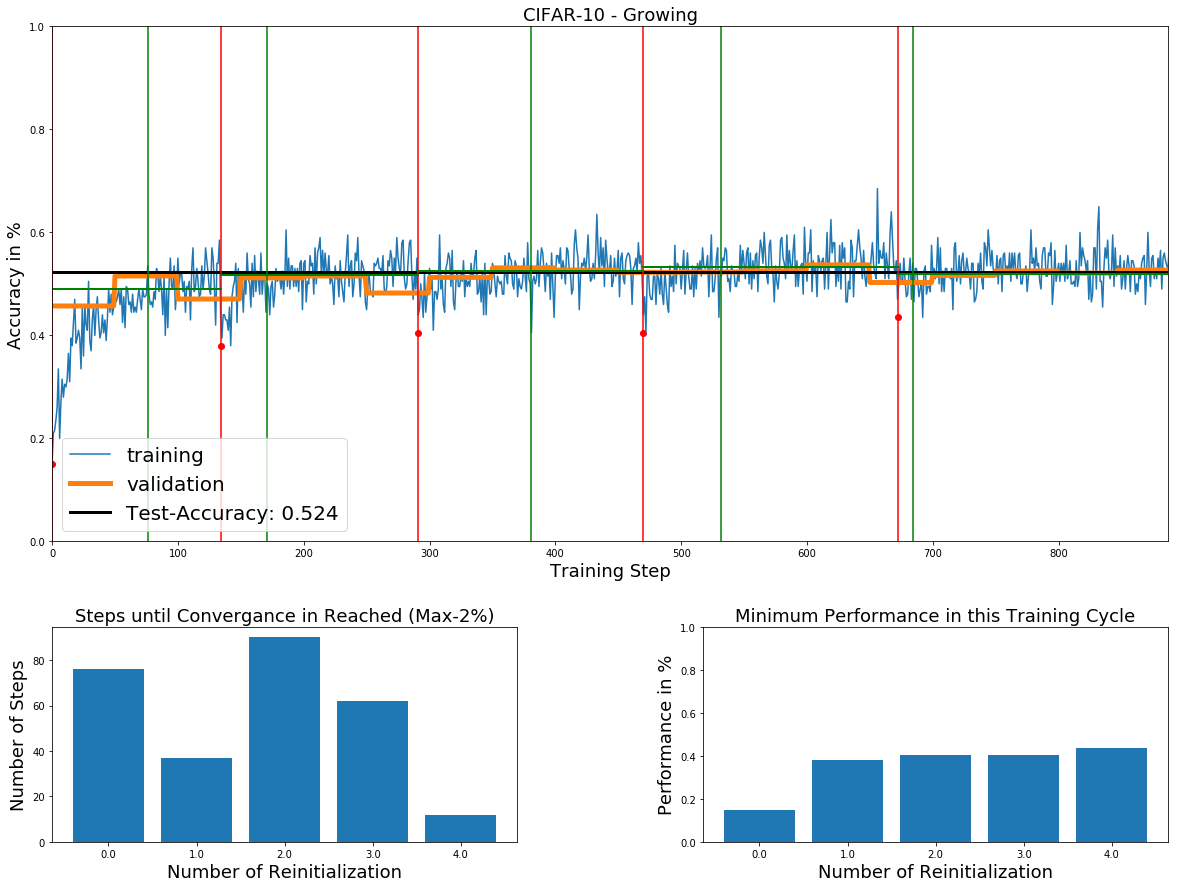

In [36]:
plotPerformance(training_accuracies,validation_accuracies,ESteps,test_accuracy,"CIFAR-10 - Growing")
#plt.savefig('NewResults/CIFAR_Normal.png')

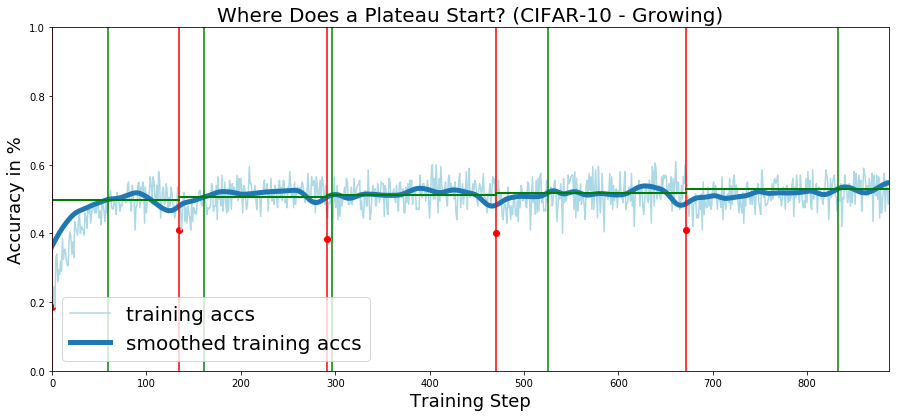

In [42]:
def plotPerformance2(training_accuracies,validation_accuracies,steps,testacc,title):
    fig = plt.figure(figsize=(15,10))
    grid = plt.GridSpec(3,2,hspace=0.4, wspace=0.4)
    fig.add_subplot(grid[:2,:])
    plt.plot(training_accuracies,'lightblue')
    plt.plot(smoothListGaussian(training_accuracies,degree=20), linewidth=5)
    #plt.plot(np.append(validation_accuracies,validation_accuracies[-1]), linewidth=5)
    #plt.plot(np.full(steps[-1],testacc), linewidth=3, color = 'black')
    plt.xlabel("Training Step", fontsize=18)
    plt.ylabel("Accuracy in %", fontsize=18)
    plt.title(title, fontsize=20)
    plt.xlim(0,steps[-1]-10)
    plt.ylim(0,1)
    plt.legend(['training accs','smoothed training accs'],fontsize=20,loc=3)
    start,v,mini = perfQuantifier(training_accuracies,steps)
    for s in steps:
        plt.axvline(x=s,color='r')
    for i in range(steps.shape[0]-1):
        plt.plot(np.linspace(steps[i],steps[i+1],steps[i+1]-steps[i]),np.full(steps[i+1]-steps[i],v[i]), linewidth=2, color = 'green')
        plt.axvline(x=steps[i]+start[i],color='green')
    plt.scatter(steps[:-1],mini,color='r')
training_accuracies[896:] = 0.55
plotPerformance2(training_accuracies,validation_accuracies,ESteps,test_accuracy,"Where Does a Plateau Start? (CIFAR-10 - Growing)")
#plt.savefig('NewResults/PlateauStart.png')

### Plot Performance Comparison for Old and New Classes

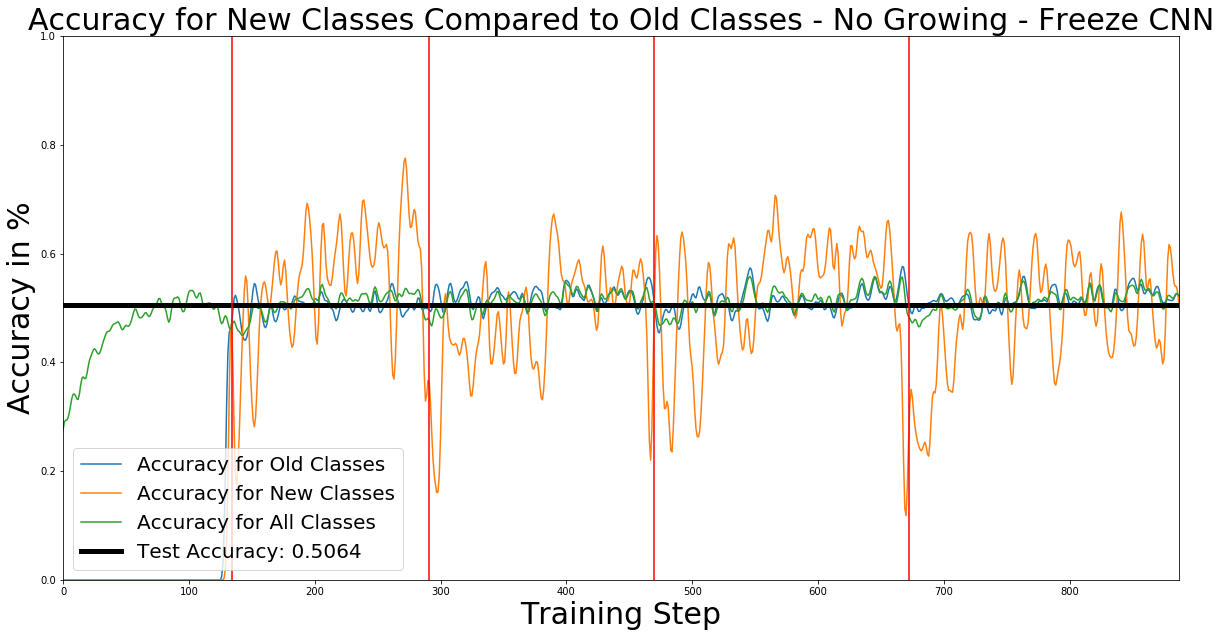

In [43]:
plt.figure(figsize=(20,10))
training_accuracies_new[:ESteps[1]]=0
training_accuracies_old[:ESteps[1]]=0
plt.plot(smoothListGaussian(training_accuracies_old))
plt.plot(smoothListGaussian(training_accuracies_new))
plt.plot(smoothListGaussian(training_accuracies))
plt.plot(np.full(ESteps[-1]-10,test_accuracy), linewidth=5, color = 'black')
plt.xlabel("Training Step", fontsize=30)
plt.ylabel("Accuracy in %", fontsize=30)
plt.title("Accuracy for New Classes Compared to Old Classes - No Growing - Freeze CNN", fontsize=30)
plt.xlim(0,ESteps[-1]-10)
plt.ylim(0,1)
plt.legend(['Accuracy for Old Classes','Accuracy for New Classes','Accuracy for All Classes','Test Accuracy: '+str(test_accuracy)],fontsize=20,loc=3)
plt.axvline(x=134,color='r')
plt.axvline(x=291,color='r')
plt.axvline(x=470,color='r')
plt.axvline(x=672,color='r')
plt.axvline(x=897,color='r')
plt.show()
#plt.savefig('NewResults/CIFAR10_NoGrow_Freeze_ON.png')

### Weight Initialization Comparison
Run the above experiment with all weight initializations you want to compare (here 0, random and old weights) and save the accuracies every time with the three cells below. Then plot it with the forth cell.

In [20]:
ta0 = training_accuracies
va0 = validation_accuracies

In [16]:
taR = training_accuracies
vaR = validation_accuracies

In [11]:
taW = training_accuracies
vaW = validation_accuracies

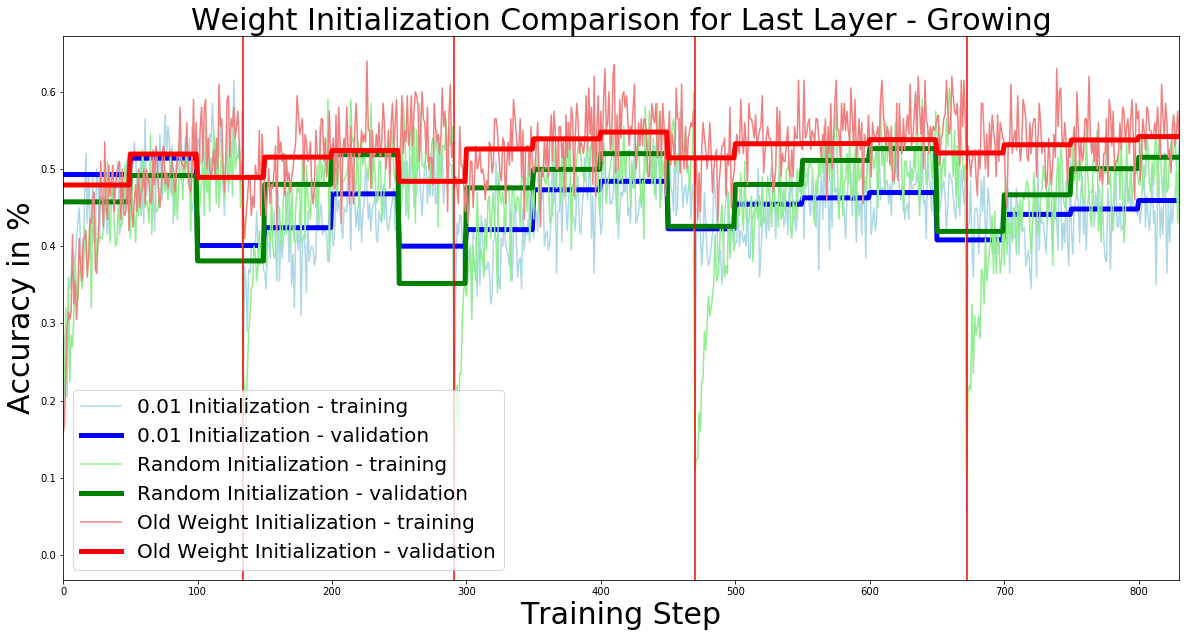

In [43]:
plt.figure(figsize=(20,10))
plt.plot(ta0,color='lightblue')
plt.plot(va0, linewidth=5,color='blue')
plt.plot(taR,color = 'lightgreen')
plt.plot(vaR, linewidth=5,color='green')
plt.plot(taW,color ='lightcoral')
plt.plot(vaW, linewidth=5,color = 'red')
#plt.plot(np.full(850,0.5), linewidth=5, color = 'black')
plt.xlabel("Training Step", fontsize=30)
plt.ylabel("Accuracy in %", fontsize=30)
plt.title("Weight Initialization Comparison for Last Layer - Growing", fontsize=30)
plt.xlim(0,830)
plt.legend(['0.01 Initialization - training','0.01 Initialization - validation','Random Initialization - training','Random Initialization - validation','Old Weight Initialization - training','Old Weight Initialization - validation'],fontsize=20,loc=3)
plt.axvline(x=134,color='r')
plt.axvline(x=291,color='r')
plt.axvline(x=470,color='r')
plt.axvline(x=672,color='r')
plt.axvline(x=897,color='r')
plt.show()
#plt.savefig('NewResults/weightInitComp.png', bbox_inches='tight')

#### Accuracies of 100 runs for each condition, freezing layers as well as differently balanced data sets are in a separate script.